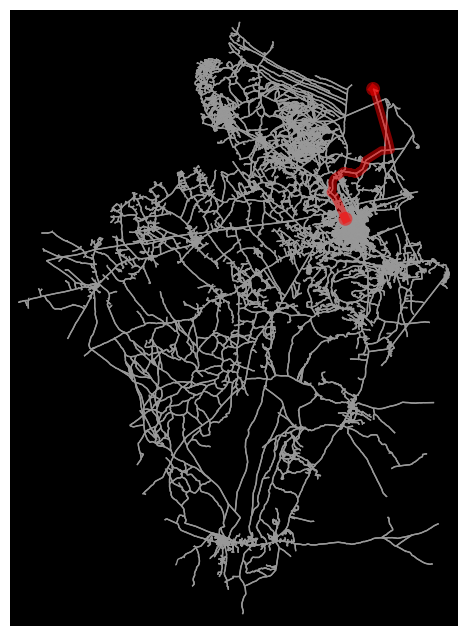

None


In [27]:
import networkx as nx 
import pickle
import geopandas as gpd
import json
import osmnx as ox 
import matplotlib as plt

class ofline_route(object):
    def __init__(self,graph,start_point,end_point):
        self.graph = graph
        self.start = start_point
        self.end = end_point
        self.G = None

    def read_graph(self):
        # graph = nx.read_gpickle(self.graph)
        # return graph.plot()

        with open(self.graph, 'rb') as f:
            self.G = pickle.load(f)

    
    def create_route(self):
        nodes, edges = ox.graph_to_gdfs(G=self.G, nodes=True, edges=True)
        

        # _________________________________________________________________________________________________________
        start_nearest_node = ox.nearest_nodes(self.G, X=self.start[0],Y=self.start[1] )  
        end_nearest_node = ox.nearest_nodes(self.G,X=self.end[0],Y=self.end[1])        
        
        route = nx.shortest_path(self.G,source=start_nearest_node , target=end_nearest_node)
        fig ,ax = ox.plot_graph_route(self.G, route, route_linewidth=6, node_size=0, bgcolor='k')
        ax.set_facecolor('lightgray')


result = ofline_route(graph=r"D:\12 _ ofline-route\files\Riyadh 2.pickle",start_point=( 46.6142281225803,24.827254623865255),end_point=( 46.93309489801932,26.50560539905626))
result.read_graph()
print(result.create_route())
    